In [1]:
import pandas as pd
import numpy as np
import dtale
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import math
import numpy as np
import numpy.linalg as nla
import pandas as pd
import re
import six
from os.path import join
from matplotlib import pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-05-04 02:53:21,118 - tensorflow - WARNING - From c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
%reload_kedro

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2021-05-04 02:53:22,321 - root - INFO - ** Kedro project coursing-ml
2021-05-04 02:53:22,330 - root - INFO - Defined global variable `context` and `catalog`


In [3]:
df = catalog.load("data_labeled_coursera")
clusterer =  catalog.load("clustering_model_coursera")

2021-05-04 02:53:22,340 - kedro.io.data_catalog - INFO - Loading data from `data_labeled_coursera` (CSVDataSet)...
2021-05-04 02:53:22,370 - kedro.io.data_catalog - INFO - Loading data from `clustering_model_coursera` (PickleDataSet)...


In [4]:
df

,difficulty,total_hours,enrolled,rating,institution,Label
0,beginner,120.0,0.0,4.3,IBM,-1
1,advanced,240.0,542057.0,4.8,Google,-1
2,beginner,160.0,208490.0,4.7,Google,-1
3,beginner,56.0,0.0,3.8,National Research Nuclear University MEPhI,-1
4,intermediate,168.0,16289.0,4.3,Moscow Institute of Physics and Technology,-1
...,...,...,...,...,...,...
6533,beginner,1.0,0.0,4.7,Coursera,6
6534,beginner,48.0,16276.0,4.8,Cloudera,1
6535,beginner,0.0,0.0,4.7,NaN,-1
6536,beginner,21.0,3689.0,4.7,HSE University,15


c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



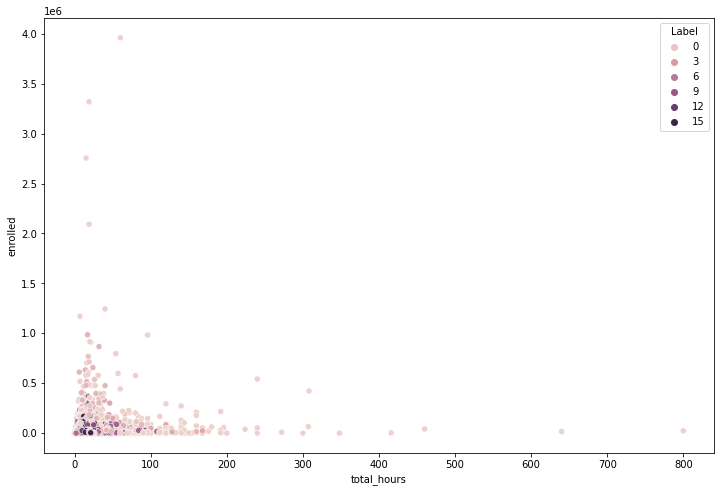

In [5]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df['total_hours'], df['enrolled'], hue=df['Label'])
plt.show()

In [6]:
clusterer.labels_.max()

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



16

<AxesSubplot:ylabel='$\\lambda$ value'>

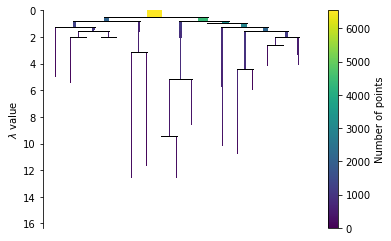

In [7]:
clusterer.condensed_tree_.plot()

In [8]:
d = dtale.show(df, ignore_duplicate=True)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.



In [37]:

mask = df["Label"] == 16
indices_16 = df.loc[mask].index
mask = df["Label"] == 15
indices_15 = df.loc[mask].index
mask = df["Label"] == 14
indices_14 = df.loc[mask].index
mask = df["Label"] == 13
indices_13 = df.loc[mask].index
mask = df["Label"] == 12
indices_12 = df.loc[mask].index

mask = df["Label"] == 11
indices_11 = df.loc[mask].index
mask = df["Label"] == 10
indices_10 = df.loc[mask].index
mask = df["Label"] == 9
indices_9 = df.loc[mask].index
mask = df["Label"] == 8
indices_8 = df.loc[mask].index
mask = df["Label"] == 7
indices_7 = df.loc[mask].index
mask = df["Label"] == 6
indices_6 = df.loc[mask].index
mask = df["Label"] == 5
indices_5 = df.loc[mask].index
mask = df["Label"] == 4
indices_4 = df.loc[mask].index
mask = df["Label"] == 3
indices_3 = df.loc[mask].index
mask = df["Label"] == 2
indices_2 = df.loc[mask].index
mask = df["Label"] == 1
indices_1 = df.loc[mask].index

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [38]:
df_1 = df.iloc[indices_1]
df_1

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
25,beginner,80.0,87869.0,4.8,California Institute of the Arts,1
41,beginner,72.0,7222.0,4.8,University of Colorado System,1
52,beginner,10.0,25190.0,4.8,The University of Edinburgh,1
59,beginner,96.0,2178.0,4.8,University of Illinois at Urbana-Champaign,1
63,beginner,5.0,6748.0,4.8,Pontificia Universidad Católica de Chile,1
...,...,...,...,...,...,...
6505,beginner,10.0,332288.0,4.8,McMaster University,1
6509,beginner,9.0,12238.0,4.8,University of Colorado System,1
6517,beginner,13.0,15681.0,4.8,University of Pennsylvania,1
6525,beginner,42.0,30664.0,4.8,Universitat Autònoma de Barcelona,1


In [39]:
df_2 = df.iloc[indices_2]
df_2

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
53,intermediate,30.0,41446.0,4.8,"University of California, Santa Cruz",2
58,intermediate,48.0,30678.0,4.8,Google Cloud,2
70,advanced,22.0,3820.0,4.8,"University of California, Santa Cruz",2
75,intermediate,9.0,4748.0,4.8,Icahn School of Medicine at Mount Sinai,2
99,advanced,140.0,7384.0,4.8,University of Colorado Boulder,2
...,...,...,...,...,...,...
6343,intermediate,15.0,52521.0,4.8,Yale University,2
6370,intermediate,29.0,19752.0,4.8,University of Michigan,2
6389,intermediate,24.0,4642.0,4.8,DeepLearning.AI,2
6436,intermediate,13.0,2140.0,4.8,Google Cloud,2


In [40]:
df_3 = df.iloc[indices_3]
df_3

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
30,intermediate,2.0,0.0,4.7,Coursera,3
32,intermediate,2.0,0.0,4.7,Coursera,3
48,intermediate,1.0,0.0,4.7,Coursera,3
49,intermediate,1.5,0.0,4.7,Coursera,3
54,intermediate,2.0,0.0,4.7,Coursera,3
...,...,...,...,...,...,...
6406,intermediate,2.0,0.0,4.7,Coursera,3
6432,advanced,2.0,0.0,4.7,Coursera,3
6480,intermediate,1.0,0.0,4.7,Coursera,3
6490,intermediate,2.0,0.0,4.7,Coursera,3


In [41]:
df_4 = df.iloc[indices_4]
df_4

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
65,intermediate,6.0,0.0,4.7,NaN,4
127,intermediate,8.0,0.0,4.7,NaN,4
147,intermediate,7.0,0.0,4.7,NaN,4
207,intermediate,13.0,0.0,4.7,Google Cloud,4
247,intermediate,68.0,0.0,4.7,EIT Digital,4
...,...,...,...,...,...,...
6434,intermediate,13.0,0.0,4.7,INSEAD,4
6442,intermediate,13.0,0.0,4.7,Google Cloud,4
6457,intermediate,5.0,0.0,4.7,"University of California, Irvine",4
6468,intermediate,31.0,0.0,4.7,Imperial College London,4


In [42]:
df_5 = df.iloc[indices_5]
df_5

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
14,beginner,14.0,0.0,4.7,IBM,5
29,beginner,16.0,0.0,4.7,Google Cloud,5
44,beginner,48.0,0.0,4.7,University of Michigan,5
80,beginner,6.0,0.0,4.7,"University of California, Irvine",5
87,beginner,8.0,0.0,4.7,NaN,5
...,...,...,...,...,...,...
6440,beginner,19.0,0.0,4.7,IBM,5
6450,beginner,22.0,0.0,4.7,Yad Vashem,5
6464,beginner,15.0,0.0,4.7,"University of California, Santa Cruz",5
6469,beginner,14.0,0.0,4.7,IBM,5


In [43]:
df_6 = df.iloc[indices_6]
df_6

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
82,beginner,1.0,0.0,4.7,Coursera,6
213,beginner,1.0,0.0,4.7,Coursera,6
283,beginner,1.0,0.0,4.7,Coursera,6
329,beginner,1.0,0.0,4.7,Coursera,6
366,beginner,1.0,0.0,4.7,Coursera,6
...,...,...,...,...,...,...
6001,beginner,1.0,0.0,4.7,Coursera,6
6096,beginner,1.0,0.0,4.7,Coursera,6
6311,beginner,1.0,0.0,4.7,Coursera,6
6492,beginner,1.0,0.0,4.7,Coursera,6


In [44]:
df_7 = df.iloc[indices_7]
df_7

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
31,beginner,2.0,0.0,4.7,Coursera,7
43,beginner,2.0,0.0,4.7,Coursera,7
61,beginner,2.0,0.0,4.7,Coursera,7
77,beginner,1.5,0.0,4.7,Coursera,7
96,beginner,2.0,0.0,4.7,Coursera,7
...,...,...,...,...,...,...
6399,beginner,2.0,0.0,4.7,Coursera,7
6401,beginner,2.0,0.0,4.7,Coursera,7
6491,beginner,2.0,0.0,4.7,Coursera,7
6512,beginner,2.0,0.0,4.7,Coursera,7


In [45]:
df_8 = df.iloc[indices_8]
df_8

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
76,intermediate,12.0,7232.0,4.7,Duke University,8
126,intermediate,31.0,105640.0,4.7,University of Michigan,8
132,intermediate,60.0,1776.0,4.7,Berklee College of Music,8
146,intermediate,13.0,19045.0,4.7,University of Michigan,8
180,intermediate,18.0,27409.0,4.7,DeepLearning.AI,8
...,...,...,...,...,...,...
6451,intermediate,13.0,31848.0,4.7,Google Cloud,8
6458,intermediate,12.0,47646.0,4.7,University of Minnesota,8
6461,intermediate,20.0,6900.0,4.7,University of Illinois at Urbana-Champaign,8
6472,intermediate,31.0,12506.0,4.7,École Polytechnique Fédérale de Lausanne,8


In [46]:
df_9 = df.iloc[indices_9]
df_9

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
42,intermediate,2.0,1738.0,4.7,Coursera,9
56,advanced,3.0,1545.0,4.7,Yandex,9
162,intermediate,1.0,2555.0,4.7,Coursera,9
231,intermediate,1.0,2753.0,4.7,Coursera,9
232,intermediate,1.5,2864.0,4.7,Coursera,9
...,...,...,...,...,...,...
6298,intermediate,2.0,8664.0,4.7,Coursera,9
6418,intermediate,1.0,1703.0,4.7,Coursera,9
6426,intermediate,1.0,2233.0,4.7,Coursera,9
6463,intermediate,2.0,2635.0,4.7,Coursera,9


In [47]:
df_10 = df.iloc[indices_10]
df_10

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
27,beginner,12.0,16314.0,4.6,"University of California, Davis",10
40,beginner,21.0,5036.0,4.6,University of Colorado Boulder,10
64,beginner,15.0,89013.0,4.6,HEC Paris,10
86,beginner,7.0,7590.0,4.6,Wesleyan University,10
94,beginner,19.0,122051.0,4.6,University at Buffalo,10
...,...,...,...,...,...,...
6479,beginner,7.0,6718.0,4.6,Tel Aviv University,10
6489,beginner,12.0,24237.0,4.6,Copenhagen Business School,10
6507,beginner,11.0,5021.0,4.6,Northwestern University,10
6510,beginner,17.0,82599.0,4.6,University of Washington,10


In [48]:
df_11 = df.iloc[indices_11]
df_11

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
17,intermediate,16.0,18076.0,4.6,University at Buffalo,11
60,intermediate,48.0,11983.0,4.6,Alberta Machine Intelligence Institute,11
66,intermediate,10.0,29283.0,4.6,"University of California, Santa Cruz",11
221,intermediate,64.0,23393.0,4.6,University of Minnesota,11
225,advanced,30.0,4297.0,4.6,EIT Digital,11
...,...,...,...,...,...,...
6266,intermediate,9.0,43885.0,4.6,Amazon Web Services,11
6337,intermediate,11.0,22484.0,4.6,Indian School of Business,11
6354,advanced,9.0,11704.0,4.6,IBM,11
6503,intermediate,47.0,4407.0,4.6,École Polytechnique Fédérale de Lausanne,11


In [49]:
df_12 = df.iloc[indices_12]
df_12

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
16,advanced,40.0,23979.0,4.3,The State University of New York,12
28,intermediate,13.0,12953.0,4.5,INSEAD,12
45,intermediate,80.0,7265.0,4.5,Fundação Instituto de Administração,12
88,intermediate,14.0,18519.0,4.3,Vanderbilt University,12
100,intermediate,26.0,8919.0,4.5,Fundação Instituto de Administração,12
...,...,...,...,...,...,...
6486,intermediate,8.0,11713.0,4.4,Universidade de São Paulo,12
6494,advanced,16.0,41597.0,4.4,LearnQuest,12
6496,intermediate,15.0,21381.0,4.4,University of Michigan,12
6497,intermediate,14.0,8357.0,4.2,Universidad Nacional Autónoma de México,12


In [50]:
df_13 = df.iloc[indices_13]
df_13

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
69,beginner,12.0,13137.0,4.5,Amazon Web Services,13
83,beginner,15.0,122495.0,4.5,"University of California, Santa Cruz",13
261,beginner,32.0,8386.0,4.5,Wesleyan University,13
288,beginner,9.0,5981.0,4.5,Indian School of Business,13
296,beginner,16.0,12384.0,4.5,Rice University,13
...,...,...,...,...,...,...
6471,beginner,15.0,2384.0,4.5,Koç University,13
6473,beginner,13.0,18348.0,4.5,University of Illinois at Urbana-Champaign,13
6481,beginner,11.0,32270.0,4.5,Lund University,13
6482,beginner,20.0,22575.0,4.5,HSE University,13


In [51]:
df_14 = df.iloc[indices_14]
df_14

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
15,beginner,10.0,2470.0,4.1,Sciences Po,14
50,beginner,19.0,17167.0,4.4,Northwestern University,14
109,beginner,10.0,12403.0,4.4,Berklee College of Music,14
114,beginner,18.0,60731.0,4.4,University of California San Diego,14
128,beginner,12.0,24169.0,4.4,Sciences Po,14
...,...,...,...,...,...,...
6448,beginner,20.0,25655.0,4.3,University of Illinois at Urbana-Champaign,14
6477,beginner,14.0,53829.0,4.4,Michigan State University,14
6515,beginner,13.0,23204.0,4.4,University of Minnesota,14
6521,beginner,22.0,11003.0,3.9,Michigan State University,14


In [52]:
df_15 = df.iloc[indices_15]
df_15

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
26,beginner,6.0,4024.0,4.7,Case Western Reserve University,15
62,beginner,48.0,15303.0,4.7,Imperial College London,15
84,beginner,22.0,119652.0,4.7,University of Kentucky,15
101,beginner,11.0,26219.0,4.7,University of Virginia,15
106,beginner,11.0,46577.0,4.7,NaN,15
...,...,...,...,...,...,...
6504,beginner,12.0,27616.0,4.7,University of Illinois at Urbana-Champaign,15
6508,beginner,9.0,2341.0,4.7,ESSEC Business School,15
6524,beginner,14.0,28133.0,4.7,University of Pennsylvania,15
6530,beginner,14.0,9246.0,4.7,Fudan University,15


In [53]:
df_16 = df.iloc[indices_16]
df_16

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,total_hours,enrolled,rating,institution,Label
137,beginner,1.5,1817.0,4.7,Coursera,16
156,beginner,1.0,3721.0,4.7,Coursera,16
176,beginner,2.0,4536.0,4.7,Coursera,16
238,beginner,2.0,2256.0,4.7,Coursera,16
315,beginner,2.5,2727.0,4.7,Coursera,16
...,...,...,...,...,...,...
5955,beginner,2.0,3302.0,4.7,Coursera,16
6043,beginner,1.5,8338.0,4.7,Coursera,16
6154,beginner,1.5,1863.0,4.7,Coursera,16
6203,beginner,1.0,2835.0,4.7,Coursera,16


c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

